# HW1
## TODO:  Your ID goes here:
325911337, 326192846
#### TODO: You emails for here:
roioha@post.bgu.ac.il, yachil@post.bgu.ac.il
## Introduction
This is the first Deep Learning assignment of the course.
It is divided into three sections:
1. Toy classification tasks (50 pts.)
2. Toy regressions tasks (30 pts.)
3. MNIST (binary) classification task (20 pts.)

See the instructions before each section.
You are not required to normalize the data in sections 1 and 2.

## Submission
The deadline for the task is 12.12.2024 end of day.
You may work in teams of 2 or 3.

Submission is via Moodle. Submit the **already run** notebook (i.e., with its output, figures, etc.,).

#Section 1: Classification Tasks
## TODO
For the entire section, do the following (i.e., only once):
1. Write a training function that returns the trained model and training loss
2. Write a plotting function to plot the training loss
3. Write a plotting function that scatter plots the predicted labels and decision boundaries.
4. Write a preprocessing function to handle the data (convert to pytorch tensor, etc).
5. Write an evaluation function that prints the set accuracy (train/test)

For each of the 5 exercises, do the following:
1. Create either a linear classifier if the problem seems linearly separable or an MLP using PyTorch. Explain your choice.
2. Train the model and plot the loss across epochs.
3. Plot the predicted labels and decision boundaries for the train set. Show the accuracy in the title (up to 3 decimals points).
4. Plot the predicted labels and decision boundaries for the test set.  Show the accuracy in the title (up to 3 decimals points).
5. Do NOT change the random seed of the data generation functions.
6. Create a Markdown cell and explain briefly (2-3 lines): why did the model perform well/poorly? What affected your design choices? What did you learn from previous attempts?


EX5 has further instructions.

## Grading:
**Accuracy** computed on the test set:
1. 80-100%: 10 pts (full grade)
2. 70-80%: 8pts
3. 60-70%: 6pts
4. < 60%: 5pts

You will also be graded on the correctness of your code and the discussion that follows each excersice.



## Setup
## DO NOT MODIFY THESE FUNCTIONS

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from mpl_toolkits.mplot3d import Axes3D


In [6]:

### EX1
def random_points_in_triangle(v1, v2, v3, n_points):
    points = []
    for _ in range(n_points):
        r1, r2 = np.random.rand(2)
        sqrt_r1 = np.sqrt(r1)
        point = (1 - sqrt_r1) * v1 + sqrt_r1 * (1 - r2) * v2 + sqrt_r1 * r2 * v3
        points.append(point)
    return np.array(points)

def generate_symmetric_triangles_data(K=3, N=100, random_state=42):
    np.random.seed(random_state)
    # Define vertices for three symmetric triangles
    side_length = 2
    height = np.sqrt(3) * side_length / 2
    triangles = [
        (np.array([0, 0]), np.array([side_length, 0]), np.array([side_length / 2, height])),
        (np.array([0, 0]), np.array([-side_length, 0]), np.array([-side_length / 2, height])),
        (np.array([0, 0]), np.array([1.5, -height]), np.array([-1.5, -height]))
    ]

    X, y = [], []
    for i, (v1, v2, v3) in enumerate(triangles):
        points = random_points_in_triangle(v1, v2, v3, N)
        X.append(points)
        y += [i] * N

    X = np.vstack(X)
    y = np.array(y)
    return X, y

### EX2
def generate_grid_data(grid_size=4, min_points=5, max_points=20, random_state=42):
    np.random.seed(random_state)
    X, y = [], []
    half_grid_size = grid_size // 2

    for i in range(grid_size):
        for j in range(grid_size):
            n_points = np.random.randint(min_points, max_points + 1)
            x_offset = i - half_grid_size + 0.5
            y_offset = j - half_grid_size + 0.5
            # Generate points more centered within the square
            points = 0.8 * (np.random.rand(n_points, 2) - 0.5) + [x_offset, y_offset]
            X.append(points)
            label = (i + j) % 2
            y += [label] * n_points

    X = np.vstack(X)
    y = np.array(y)
    return X, y

### EX3
def generate_concentric_circles_data(radii=[1, 2, 3, 4], points_per_circle=100, random_state=42):
    np.random.seed(random_state)
    X, y = [], []

    for i, radius in enumerate(radii):
        angles = np.linspace(0, 2 * np.pi, points_per_circle, endpoint=False)
        circle_x = radius * np.cos(angles) + np.random.normal(0, 0.1, points_per_circle)
        circle_y = radius * np.sin(angles) + np.random.normal(0, 0.1, points_per_circle)
        X.append(np.vstack((circle_x, circle_y)).T)
        y += [i] * points_per_circle

    X = np.vstack(X)
    y = np.array(y)
    return X, y

### EX4
def generate_nested_rectangles_data(inner_rect=(2, 1), middle_rect=(4, 2), outer_rect=(6, 3), points_per_rectangle=100, random_state=42):
    np.random.seed(random_state)
    X, y = [], []

    # Inner rectangle
    width, height = inner_rect
    x_points = width * (np.random.rand(points_per_rectangle) - 0.5)
    y_points = height * (np.random.rand(points_per_rectangle) - 0.5)
    X.append(np.vstack((x_points, y_points)).T)
    y += [0] * points_per_rectangle

    # Middle rectangle
    width, height = middle_rect
    x_points = width * (np.random.rand(points_per_rectangle) - 0.5)
    y_points = height * (np.random.rand(points_per_rectangle) - 0.5)
    # Exclude points that fall inside the inner rectangle
    mask = (np.abs(x_points) > inner_rect[0] / 2) | (np.abs(y_points) > inner_rect[1] / 2)
    X.append(np.vstack((x_points[mask], y_points[mask])).T)
    y += [1] * len(x_points[mask])

    # Outer rectangle
    width, height = outer_rect
    x_points = width * (np.random.rand(points_per_rectangle) - 0.5)
    y_points = height * (np.random.rand(points_per_rectangle) - 0.5)
    # Exclude points that fall inside the middle rectangle
    mask = (np.abs(x_points) > middle_rect[0] / 2) | (np.abs(y_points) > middle_rect[1] / 2)
    X.append(np.vstack((x_points[mask], y_points[mask])).T)
    y += [2] * len(x_points[mask])

    X = np.vstack(X)
    y = np.array(y)
    return X, y


def plot_data(X, y, title=""):
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(title)
    plt.legend(handles=scatter.legend_elements()[0], labels=set(y), title="Classes")
    plt.show()



# TODO - your general functions for Section 1

In [7]:
### Your code goes here (you may break this part to more than one cell) ####
### Imports

import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader


### Preprocessing function ####

def preprocess_data(X_train, y_train, X_test, y_test, device="cpu"):
    X_train_t = torch.tensor(X_train, dtype=torch.float32, device=device)
    y_train_t = torch.tensor(y_train, dtype=torch.long, device=device)
    X_test_t = torch.tensor(X_test, dtype=torch.float32, device=device)
    y_test_t = torch.tensor(y_test, dtype=torch.long, device=device)
    return X_train_t, y_train_t, X_test_t, y_test_t


### Training function ###

def train_model(model, X_train, y_train, num_epochs=100, batch_size=64, lr=1e-2, criterion=None):
    if criterion is None:
        criterion = nn.CrossEntropyLoss()

    device = next(model.parameters()).device
    optimizer = optim.Adam(model.parameters(), lr=lr)

    dataset = TensorDataset(X_train, y_train)
    loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

    epoch_losses = []

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0

        for xb, yb in loader:
            optimizer.zero_grad()
            logits = model(xb)
            loss = criterion(logits, yb)
            loss.backward()
            optimizer.step()
            running_loss += loss.item() * xb.size(0)

        avg_loss = running_loss / len(dataset)
        epoch_losses.append(avg_loss)

    return model, epoch_losses



### Plot training loss function ###

def plot_training_loss(losses):
    plt.figure()
    plt.plot(range(1, len(losses) + 1), losses, marker="o")
    plt.xlabel("Epoch")
    plt.ylabel("Training Loss")
    plt.title("Training Loss")
    plt.grid(True)
    plt.show()


### Plot predicted labels and decision boundaries ###

def plot_decision_boundary(model, X, y, device="cpu", set_name="Train"):
    model.eval()
    X_cpu = X.detach().cpu().numpy()
    y_cpu = y.detach().cpu().numpy()

    with torch.no_grad():
        logits = model(X)
        preds = torch.argmax(logits, dim=1)
        correct = (preds == y).float().sum().item()
        acc = correct / len(y)

    x_min, x_max = X_cpu[:, 0].min() - 1.0, X_cpu[:, 0].max() + 1.0
    y_min, y_max = X_cpu[:, 1].min() - 1.0, X_cpu[:, 1].max() + 1.0

    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 300),
        np.linspace(y_min, y_max, 300),
    )
    grid = np.c_[xx.ravel(), yy.ravel()]
    grid_t = torch.tensor(grid, dtype=torch.float32, device=device)

    with torch.no_grad():
        logits_grid = model(grid_t)
        preds_grid = torch.argmax(logits_grid, dim=1).cpu().numpy()
    Z = preds_grid.reshape(xx.shape)

    plt.figure()
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X_cpu[:, 0], X_cpu[:, 1], c=y_cpu, edgecolor="k", s=40)
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.title(f"{set_name} acc = {acc*100:.3f}%")
    plt.show()


### Evaluation function ###

def evaluate_model(model, X, y, set_name="Train"):
    model.eval()
    with torch.no_grad():
        logits = model(X)
        preds = torch.argmax(logits, dim=1)
        correct = (preds == y).float().sum().item()
        acc = correct / len(y)
    print(f"{set_name} accuracy: {acc*100:.3f}%")
    return acc


## EX1

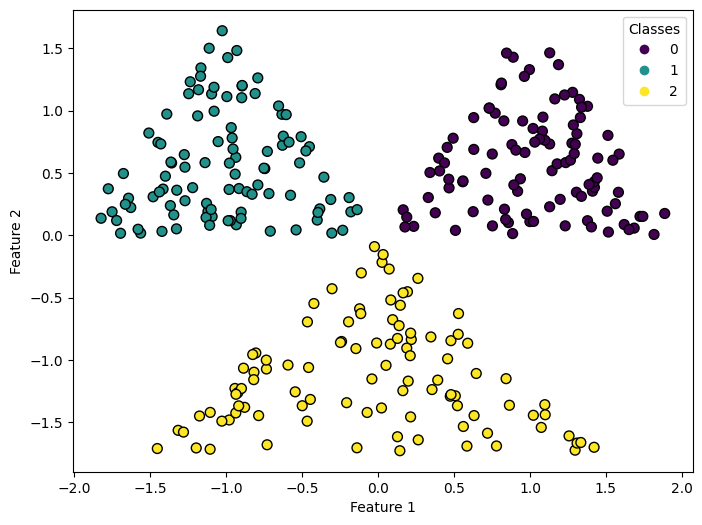

In [22]:
# Generate the data
X_train, y_train = generate_symmetric_triangles_data(random_state=0)
X_test, y_test = generate_symmetric_triangles_data(random_state=1)

# Plot the data
plot_data(X_train, y_train)


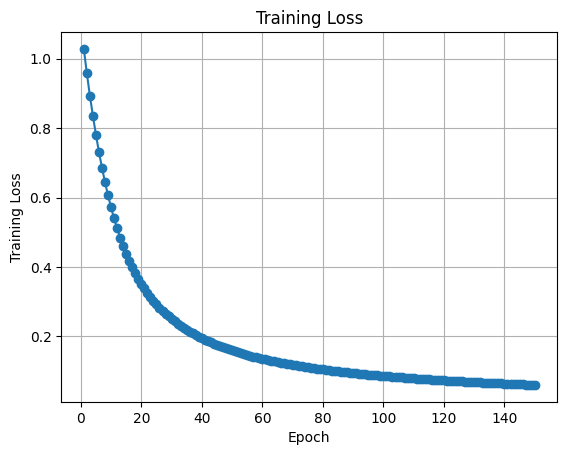

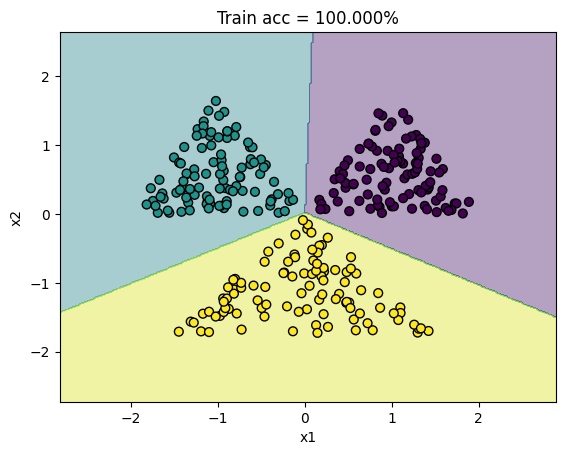

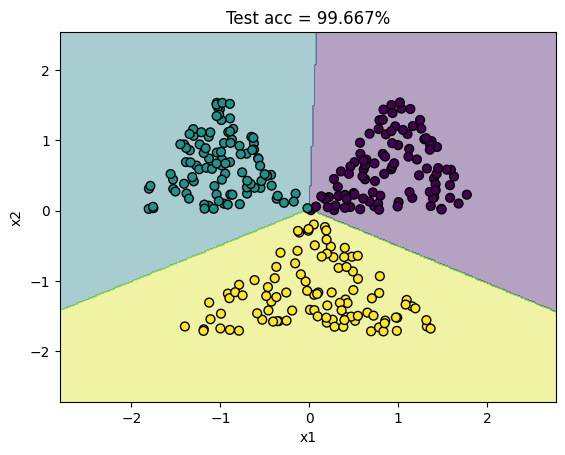

Train accuracy: 100.000%
Test accuracy: 99.667%


0.9966666666666667

In [23]:
### Your code goes here ####
#Linear regression model
device = "cuda" if torch.cuda.is_available() else "cpu"

X_train_t, y_train_t, X_test_t, y_test_t = preprocess_data(
    X_train, y_train, X_test, y_test, device=device
)

num_classes = len(torch.unique(y_train_t))

# Linear classifier
model = nn.Linear(2, num_classes).to(device)
criterion = nn.CrossEntropyLoss()

model, losses = train_model(
    model,
    X_train_t,
    y_train_t,
    num_epochs=150,
    lr=1e-2,
    batch_size=64,
    criterion=criterion
)

plot_training_loss(losses)

plot_decision_boundary(
    model,
    X_train_t,
    y_train_t,
    device=device,
    set_name="Train"
)

plot_decision_boundary(
    model,
    X_test_t,
    y_test_t,
    device=device,
    set_name="Test"
)

evaluate_model(model, X_train_t, y_train_t, set_name="Train")
evaluate_model(model, X_test_t, y_test_t, set_name="Test")


## EX2

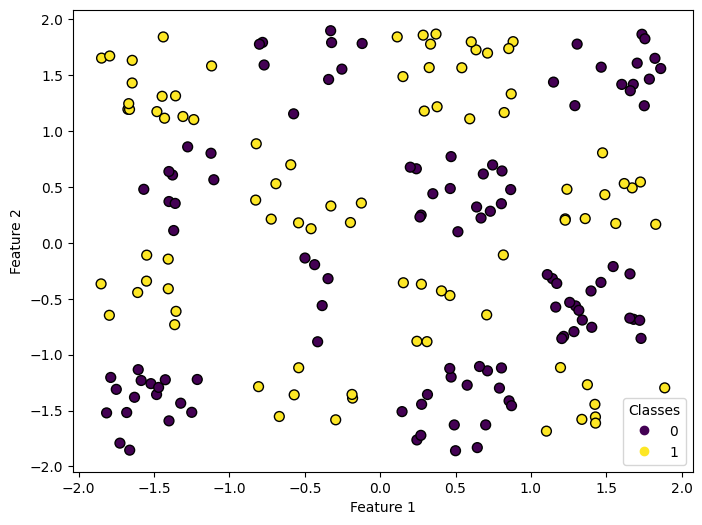

In [8]:
# Generate the data
X_train, y_train = generate_grid_data(random_state=0)
X_test, y_test = generate_grid_data(random_state=1)

# Plot the data
plot_data(X_train, y_train)

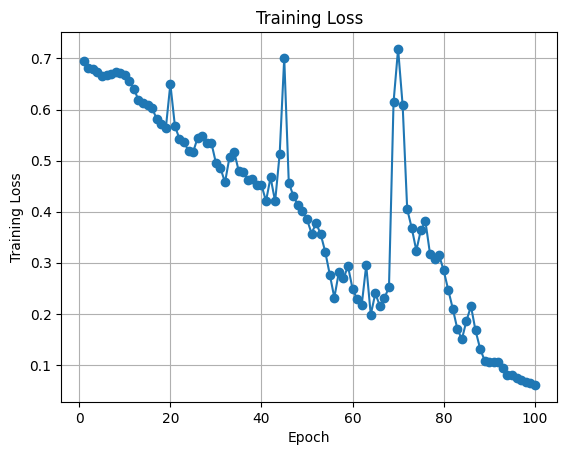

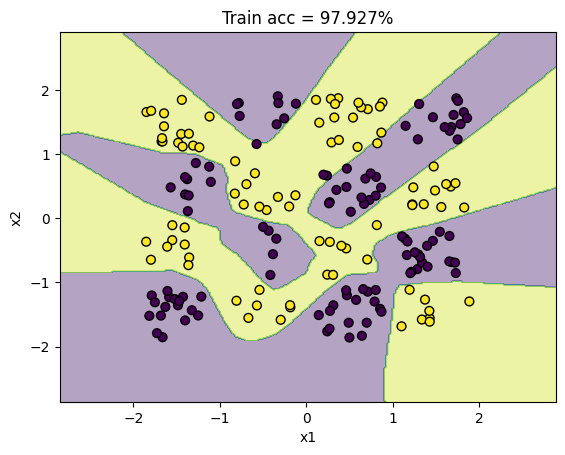

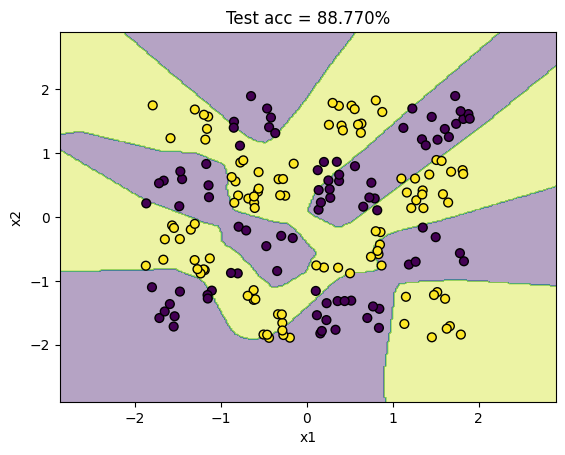

Train accuracy: 97.927%
Test accuracy: 88.770%


0.8877005347593583

In [19]:
### Your code goes here ####

device = "cuda" if torch.cuda.is_available() else "cpu"

X_train_t, y_train_t, X_test_t, y_test_t = preprocess_data(X_train, y_train, X_test, y_test, device=device)

num_classes = len(torch.unique(y_train_t))

#MLP model
model = nn.Sequential(
    nn.Linear(2, 32),
    nn.ReLU(),
    nn.Linear(32, 32),
    nn.ReLU(),
    nn.Linear(32, 32),
    nn.ReLU(),
    nn.Linear(32, 32),
    nn.ReLU(),
    nn.Linear(32, num_classes)
).to(device)

criterion = nn.CrossEntropyLoss()

model, losses = train_model(model, X_train_t, y_train_t, num_epochs=100, batch_size=64, lr=1e-2, criterion=criterion)

plot_training_loss(losses)

# Train set
plot_decision_boundary(
    model,
    X_train_t,
    y_train_t,
    device=device,
    set_name="Train"
)

# Test set
plot_decision_boundary(
    model,
    X_test_t,
    y_test_t,
    device=device,
    set_name="Test"
)
evaluate_model(model, X_train_t, y_train_t, set_name="Train")
evaluate_model(model, X_test_t, y_test_t, set_name="Test")

## EX3

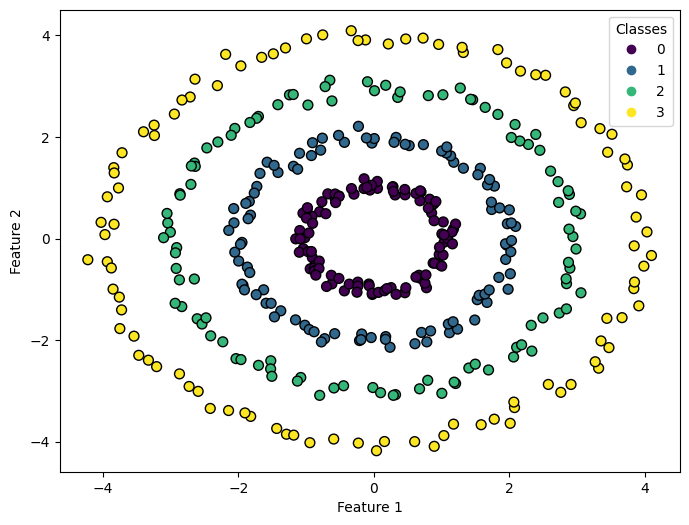

In [24]:
# Generate the data
X_train, y_train = generate_concentric_circles_data(random_state=0)
X_test, y_test = generate_concentric_circles_data(random_state=1)

# Plot the data
plot_data(X_train, y_train)


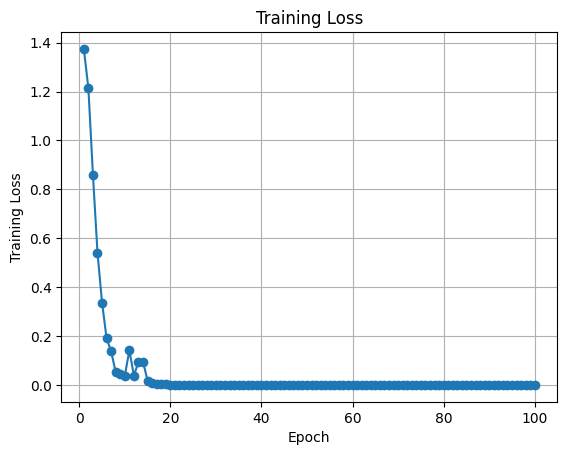

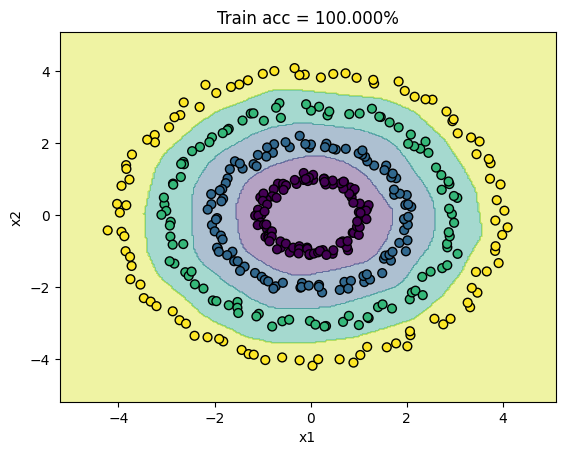

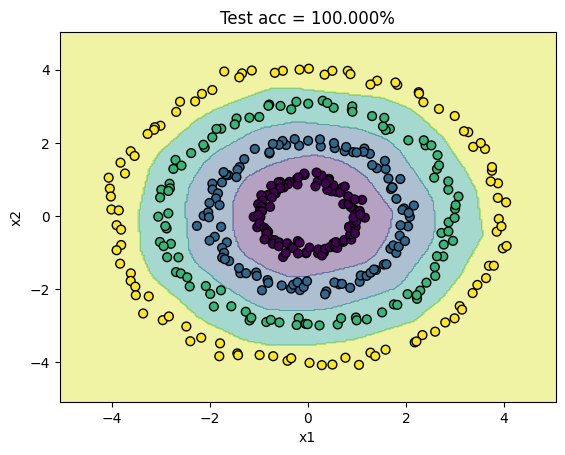

Train accuracy: 100.000%
Test accuracy: 100.000%


1.0

In [25]:
### Your code goes here ####

device = "cuda" if torch.cuda.is_available() else "cpu"

X_train_t, y_train_t, X_test_t, y_test_t = preprocess_data(X_train, y_train, X_test, y_test, device=device)

num_classes = len(torch.unique(y_train_t))

#MLP model
model = nn.Sequential(
    nn.Linear(2, 32),
    nn.ReLU(),
    nn.Linear(32, 32),
    nn.ReLU(),
    nn.Linear(32, 32),
    nn.ReLU(),
    nn.Linear(32, 32),
    nn.ReLU(),
    nn.Linear(32, num_classes)
).to(device)

criterion = nn.CrossEntropyLoss()

model, losses = train_model(model, X_train_t, y_train_t, num_epochs=100, batch_size=64, lr=1e-2, criterion=criterion)

plot_training_loss(losses)

# Train set
plot_decision_boundary(
    model,
    X_train_t,
    y_train_t,
    device=device,
    set_name="Train"
)

# Test set
plot_decision_boundary(
    model,
    X_test_t,
    y_test_t,
    device=device,
    set_name="Test"
)
evaluate_model(model, X_train_t, y_train_t, set_name="Train")
evaluate_model(model, X_test_t, y_test_t, set_name="Test")

## EX4

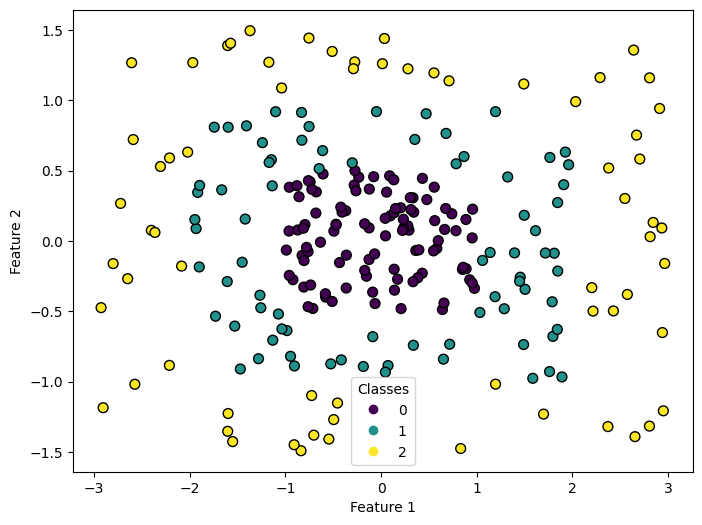

In [20]:


# Generate the data
X_train, y_train = generate_nested_rectangles_data(random_state=0)
X_test, y_test = generate_nested_rectangles_data(random_state=1)

# Plot the data
plot_data(X_train, y_train)

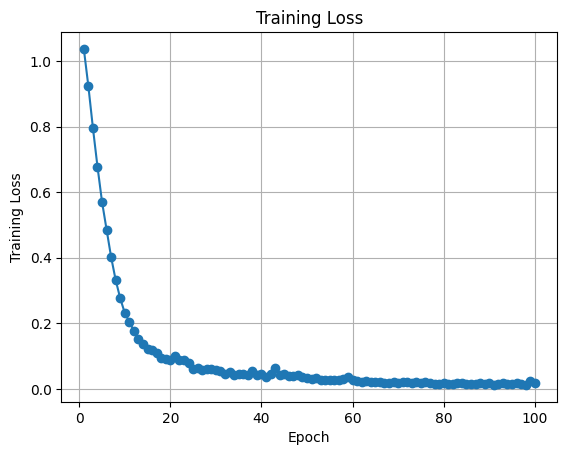

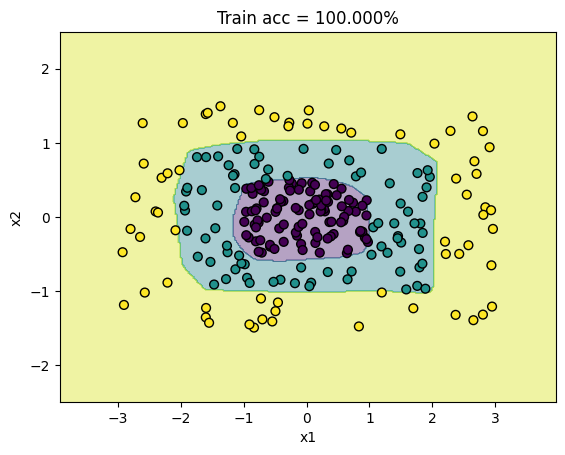

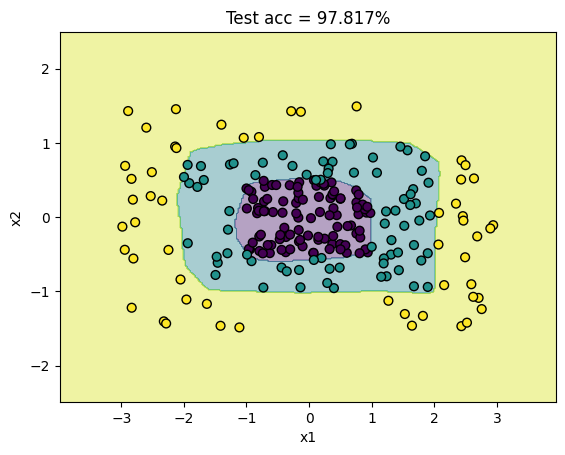

Train accuracy: 100.000%
Train accuracy: 97.817%


0.9781659388646288

In [21]:
### Your code goes here ####

device = "cuda" if torch.cuda.is_available() else "cpu"

X_train_t, y_train_t, X_test_t, y_test_t = preprocess_data(X_train, y_train, X_test, y_test, device=device)

num_classes = len(torch.unique(y_train_t))

# MLP
model = nn.Sequential(
    nn.Linear(2, 32),
    nn.ReLU(),
    nn.Linear(32, 32),
    nn.ReLU(),
    nn.Linear(32, num_classes)
).to(device)

criterion = nn.CrossEntropyLoss()

model, losses = train_model(model, X_train_t, y_train_t, num_epochs=100, batch_size=64, lr=1e-2, criterion=criterion)

plot_training_loss(losses)

plot_decision_boundary(model, X_train_t, y_train_t, device=device, set_name="Train")
plot_decision_boundary(model, X_test_t, y_test_t, device=device, set_name="Test")

evaluate_model(model, X_train_t, y_train_t)
evaluate_model(model, X_test_t, y_test_t)

## EX5 - Mystery Dataset
Load the data from the ex5.zip file:
X_train.npy
y_train.npy
X_test.npy
y_test.npy

Figure out the input and output dims and perform the classification task as in previous exercises.

You do not have to plot the data, but you may if you see fit.

In [ ]:
### Your code goes here ####

## load numpy array using np.load()

## Figure out the data dimensions

## Init and train model. Report Accuracy


#Section 2: Regression Tasks
In this section your task is to predict the value of each point (indicated by the color in the scatter plots) using it's coordinates.
## TODO
For the entire section, do the following (i.e., only once):
1. Use the training function from previous section.
2. Use the plotting function from previous section to plot the loss.
3. Use the provided plotting function to plot the data with your predicted label values. For instance:


```
plot_s_curve(X_train, y_train_pred)
```


4. Write a preprocessing function for the inputs (convert to torch tensor, etc).
5. Write an evaluation function that prints the set Mean Square Error (train/test).

For each of the 3 exercises, do the following:
1. Create an MLP using PyTorch.
2. Train the model and plot the loss across epochs.
3. Plot the predicted values for the train set. Show the MSE in the title (up to 3 decimals points).
4. Plot the predicted values for the test set. Show the MSE in the title (up to 3 decimals points).
5. Create a Markdown cell and explain briefly (2-3 lines): why did the model perform well/poorly? What affected your design choices?

**Grading**: in this section you are only graded on the correctness of your code and discussion.

**Optional**: you may want to plot the residuals between your model prediction and the true labels. For instance, you may plot the data and use the differences between the true and predicted labels as their color.

## Setup

In [27]:
from sklearn.datasets import make_s_curve
### EX7
def generate_s_curve_data(n_samples=150, random_state=42):
    X, t = make_s_curve(n_samples, random_state=random_state)
    X = X[:, [0, 2]]  # Use only 2D input (X[:, 0] and X[:, 2])
    return X, t

def create_labels_s_curve(X, t):
    # Sort the indices based on the S-curve parameter t
    sorted_indices = np.argsort(t)
    labels = np.linspace(-1, 1, len(t))
    y = np.zeros_like(t)
    y[sorted_indices] = labels
    return y

def plot_s_curve(X, y, title='S-Curve'):
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(title)
    plt.colorbar(scatter, label='Label')
    plt.show()


### EX8
def generate_spiral_data(n_points=1000, n_turns=2.5, noise=0.05, random_state=42):
    np.random.seed(random_state)
    theta = np.linspace(0, n_turns * 2 * np.pi, n_points)
    r = np.linspace(0, 1, n_points)
    x = r * np.cos(theta) + noise * np.random.randn(n_points)
    y = r * np.sin(theta) + noise * np.random.randn(n_points)
    X = np.vstack((x, y)).T
    return X, theta

def create_labels_spiral(theta):
    labels = np.linspace(-1, 1, len(theta))
    return labels

def plot_spiral(X, y, title='Spiral'):
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(title)
    plt.colorbar(scatter, label='Label')
    plt.show()

### EX9
def generate_spiral_data_3d(n_points=1000, n_turns=2.5, noise=0.05, random_state=42):
    np.random.seed(random_state)
    theta = np.linspace(0, n_turns * 2 * np.pi, n_points)
    z = np.linspace(0, 1, n_points)
    r = z
    x = r * np.cos(theta) + noise * np.random.randn(n_points)
    y = r * np.sin(theta) + noise * np.random.randn(n_points)
    X = np.vstack((x, y, z)).T
    return X, theta

def create_labels_3d_spiral(theta):
    labels = np.linspace(-1, 1, len(theta))
    return labels

def plot_spiral_3d(X, y, title='3D Spiral'):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap='viridis', edgecolor='k')
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_zlabel('Feature 3')
    ax.set_title(title)
    fig.colorbar(scatter, ax=ax, label='Label')
    plt.show()

## TODO - You general functions for Section 2

In [28]:
### Your code goes here ###
### Imports

### Preprocessing function for regression ###

def preprocess_regression(X_train, y_train, X_test, y_test, device="cpu"):
    X_train_t = torch.tensor(X_train, dtype=torch.float32, device=device)
    X_test_t  = torch.tensor(X_test,  dtype=torch.float32, device=device)

    y_train_t = torch.tensor(y_train, dtype=torch.float32, device=device).unsqueeze(1)
    y_test_t  = torch.tensor(y_test,  dtype=torch.float32, device=device).unsqueeze(1)

    return X_train_t, y_train_t, X_test_t, y_test_t

### Evaluation function (MSE) ###

def evaluate_regression(model, X, y, set_name="Train"):
    model.eval()
    criterion = nn.MSELoss()
    with torch.no_grad():
        y_pred = model(X)
        mse = criterion(y_pred, y).item()
    print(f"{set_name} MSE: {mse:.3f}")
    return mse


### Additional plotting functions ###

## EX6

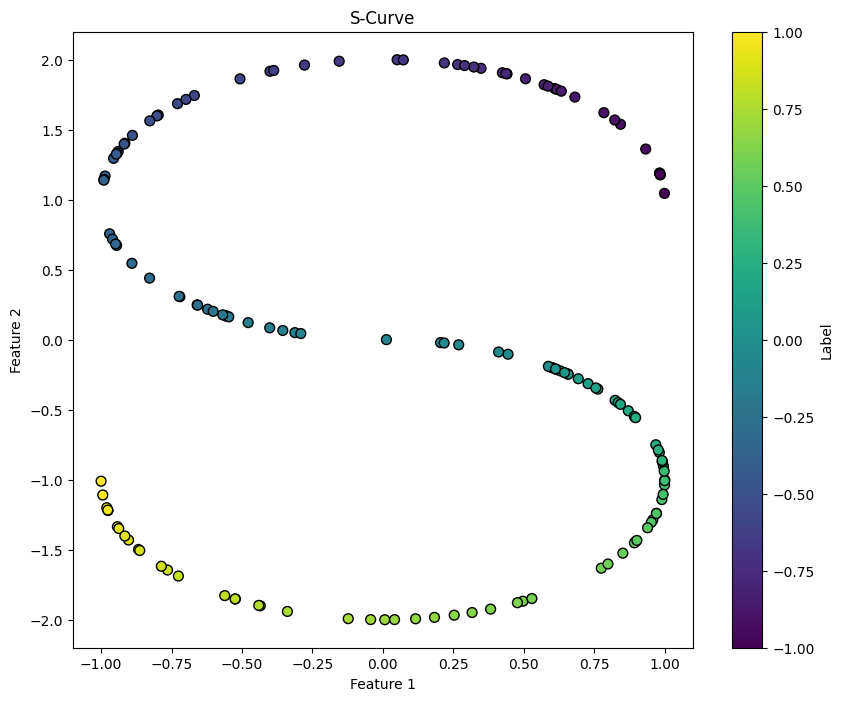

In [29]:
# Generate the data
X_train, theta_train = generate_s_curve_data(random_state=0)
X_test, theta_test = generate_s_curve_data(random_state=1)

# Create the labels
y_train = create_labels_s_curve(X_train, theta_train)
y_test = create_labels_s_curve(X_test, theta_test)

# Plot the data
plot_s_curve(X_train, y_train)

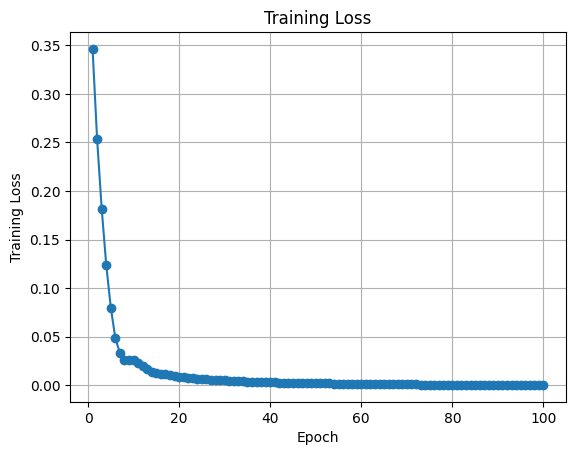

Train MSE: 0.000


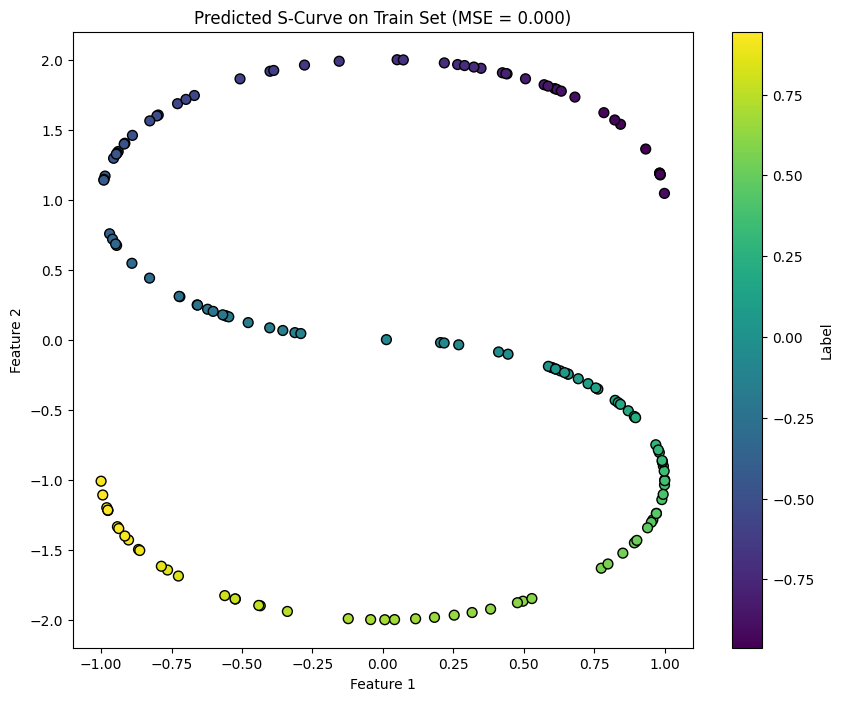

Test MSE: 0.010


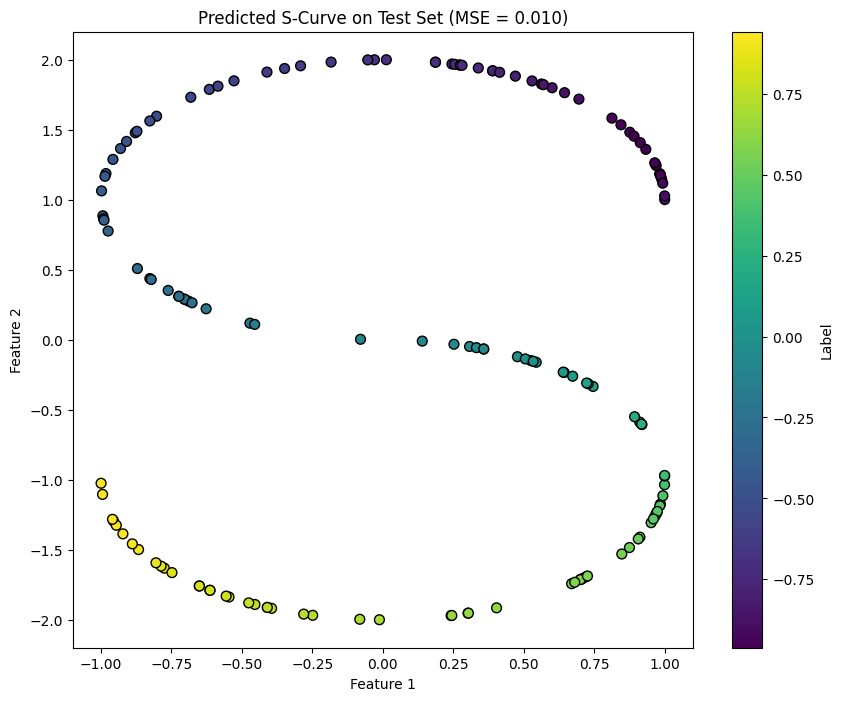

In [38]:
### Your code goes here ####
device = "cuda" if torch.cuda.is_available() else "cpu"

X_train_t, y_train_t, X_test_t, y_test_t = preprocess_regression(
    X_train, y_train, X_test, y_test, device=device
)

in_dim = X_train_t.shape[1]
out_dim = 1

model = nn.Sequential(
    nn.Linear(in_dim, 64),
    nn.ReLU(),
    nn.Linear(64, 64),
    nn.ReLU(),
    nn.Linear(64, out_dim)
).to(device)

criterion = nn.MSELoss()

model, losses = train_model(
    model,
    X_train_t,
    y_train_t,
    num_epochs=100,
    batch_size=64,
    lr=1e-3,
    criterion=criterion
)

plot_training_loss(losses)

with torch.no_grad():
    y_train_pred = model(X_train_t).cpu().numpy().squeeze()

mse_train = evaluate_regression(model, X_train_t, y_train_t, set_name="Train")
plot_s_curve(X_train, y_train_pred,
             title=f"Predicted S-Curve on Train Set (MSE = {mse_train:.3f})")

with torch.no_grad():
    y_test_pred = model(X_test_t).cpu().numpy().squeeze()

mse_test = evaluate_regression(model, X_test_t, y_test_t, set_name="Test")
plot_s_curve(X_test, y_test_pred,
             title=f"Predicted S-Curve on Test Set (MSE = {mse_test:.3f})")


## EX7

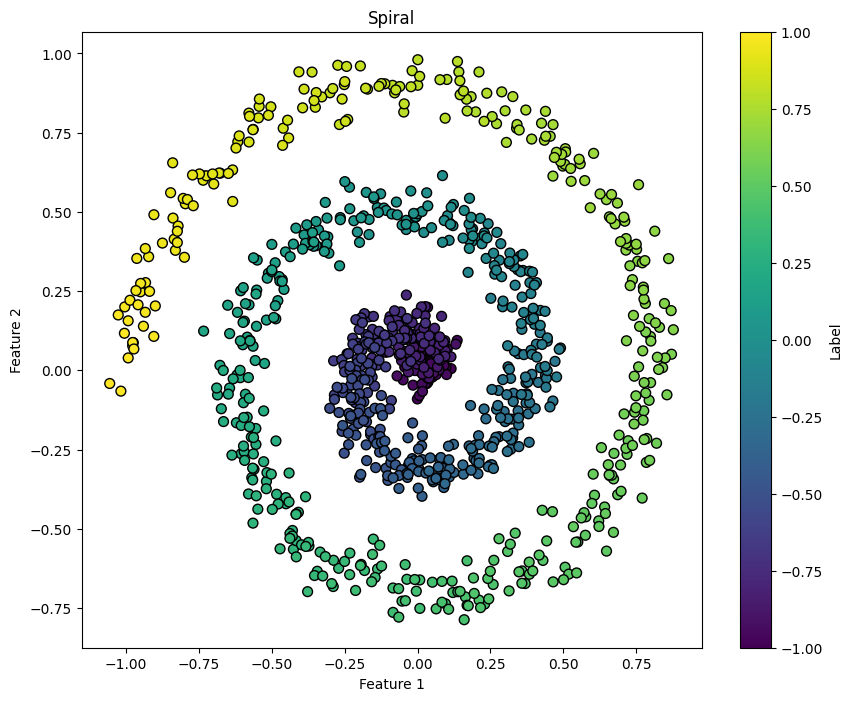

In [39]:
# Generate the data
X_train, theta_train = generate_spiral_data(random_state=0)
X_test, theta_test = generate_spiral_data(random_state=1)
# Create the labels
y_train = create_labels_spiral(theta_train)
y_test = create_labels_spiral(theta_test)
# Plot the data
plot_spiral(X_train, y_train)


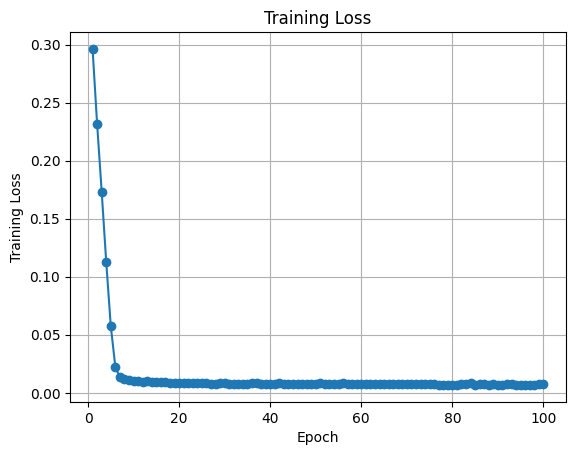

Train MSE: 0.007


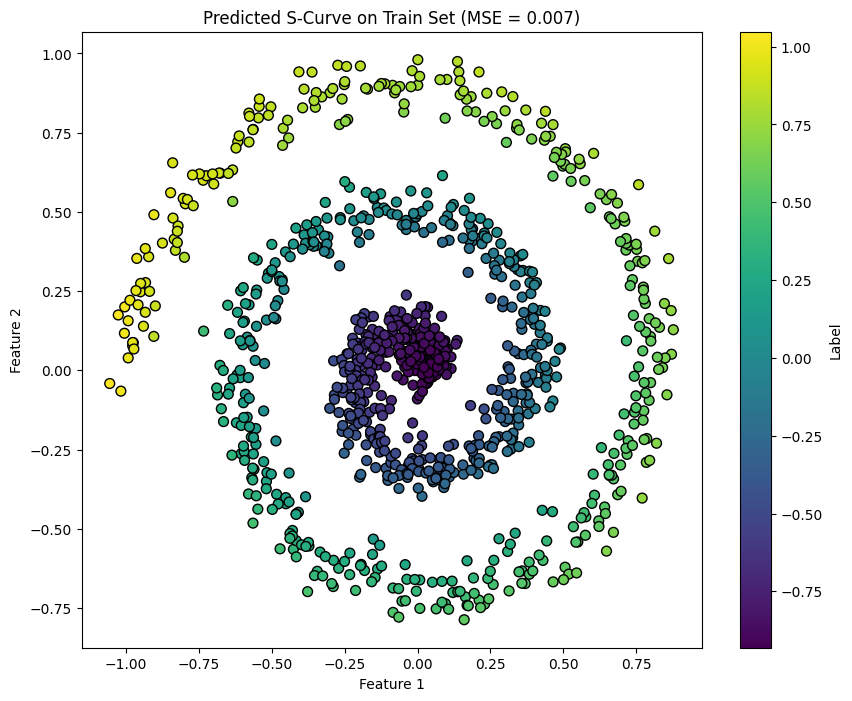

Test MSE: 0.008


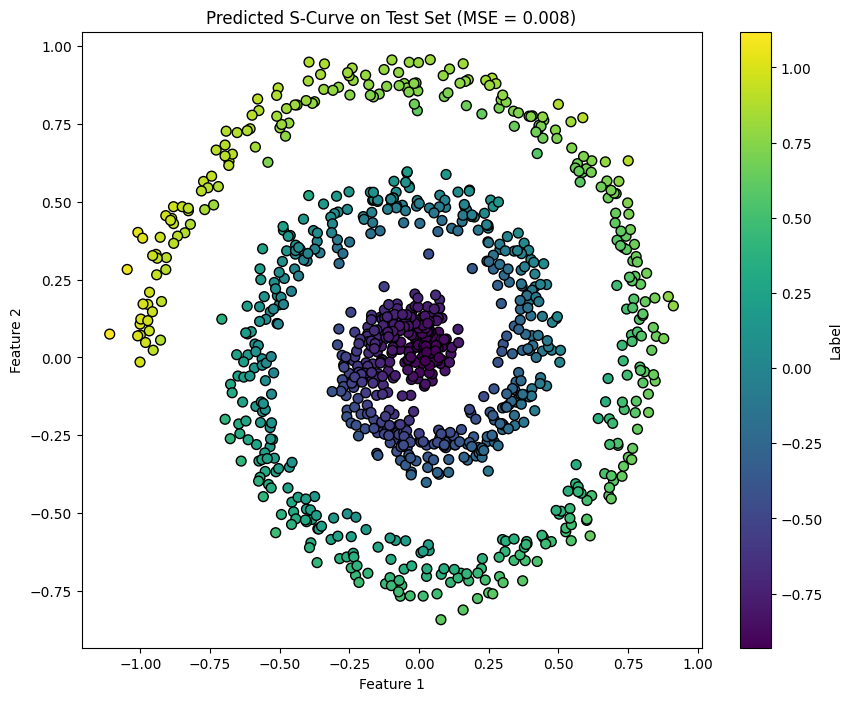

In [40]:
### Your code goes here ####
device = "cuda" if torch.cuda.is_available() else "cpu"

X_train_t, y_train_t, X_test_t, y_test_t = preprocess_regression(
    X_train, y_train, X_test, y_test, device=device
)

in_dim = X_train_t.shape[1]
out_dim = 1

model = nn.Sequential(
    nn.Linear(in_dim, 64),
    nn.ReLU(),
    nn.Linear(64, 64),
    nn.ReLU(),
    nn.Linear(64, out_dim)
).to(device)

criterion = nn.MSELoss()

model, losses = train_model(
    model,
    X_train_t,
    y_train_t,
    num_epochs=100,
    batch_size=64,
    lr=1e-3,
    criterion=criterion
)

plot_training_loss(losses)

with torch.no_grad():
    y_train_pred = model(X_train_t).cpu().numpy().squeeze()

mse_train = evaluate_regression(model, X_train_t, y_train_t, set_name="Train")
plot_s_curve(X_train, y_train_pred,
             title=f"Predicted S-Curve on Train Set (MSE = {mse_train:.3f})")

with torch.no_grad():
    y_test_pred = model(X_test_t).cpu().numpy().squeeze()

mse_test = evaluate_regression(model, X_test_t, y_test_t, set_name="Test")
plot_s_curve(X_test, y_test_pred,
             title=f"Predicted S-Curve on Test Set (MSE = {mse_test:.3f})")


## EX8

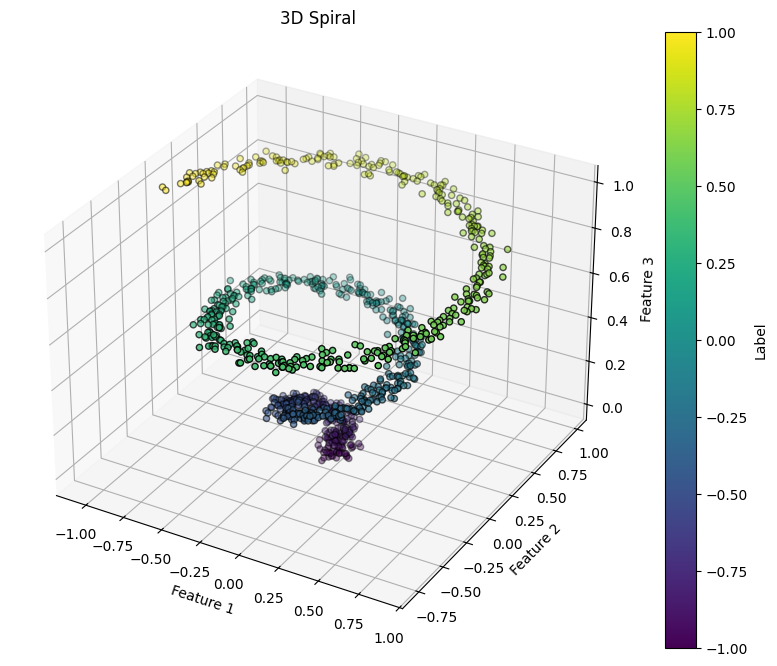

In [41]:
# Generate the data
X_train, theta_train = generate_spiral_data_3d(random_state=0)
X_test, theta_test = generate_spiral_data_3d(random_state=1)

# Create the labels
y_train = create_labels_3d_spiral(theta_train)
y_test = create_labels_3d_spiral(theta_test)

# Plot the data
plot_spiral_3d(X_train, y_train)

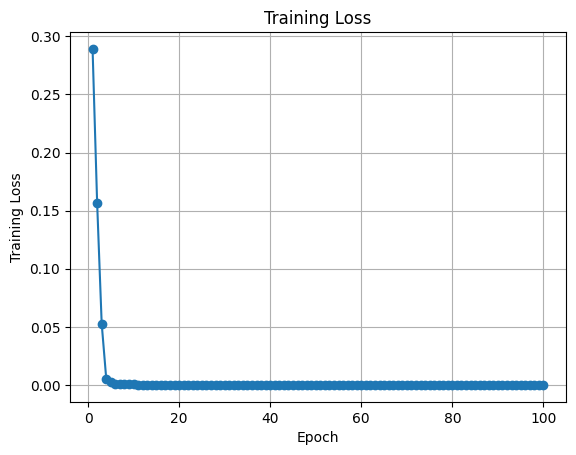

Train MSE: 0.000


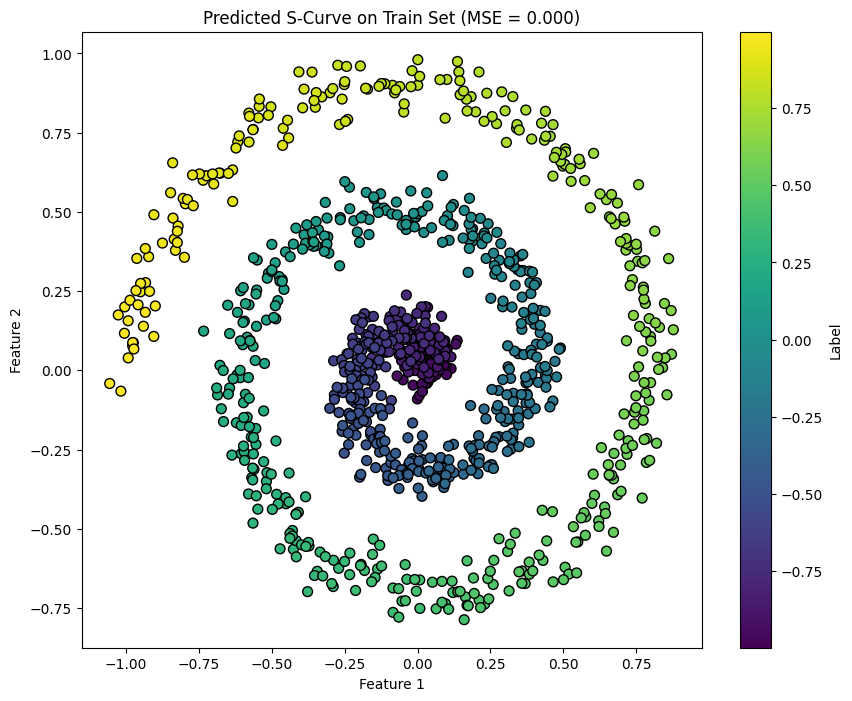

Test MSE: 0.000


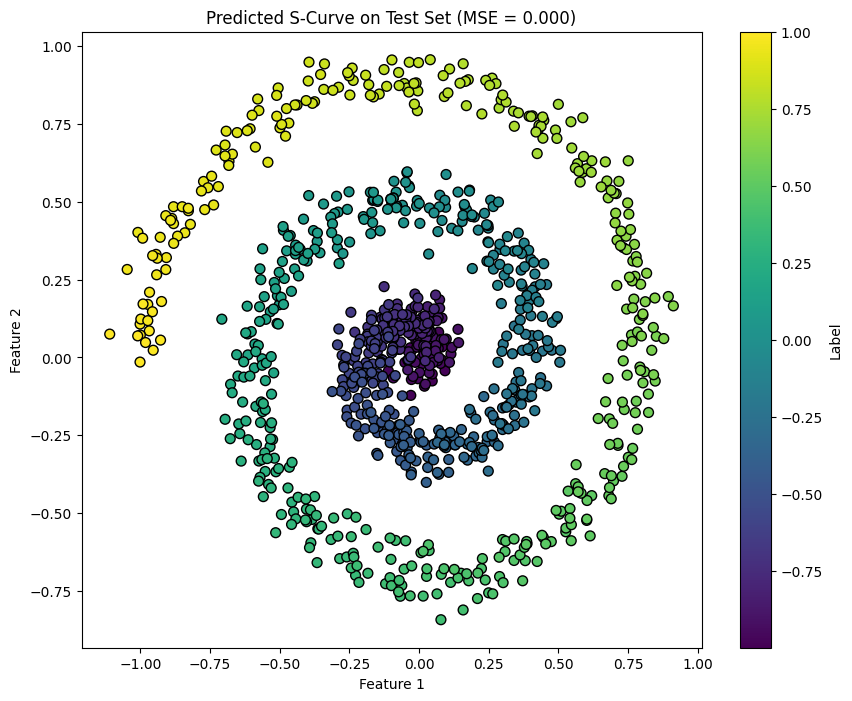

In [42]:
device = "cuda" if torch.cuda.is_available() else "cpu"

X_train_t, y_train_t, X_test_t, y_test_t = preprocess_regression(
    X_train, y_train, X_test, y_test, device=device
)

in_dim = X_train_t.shape[1]
out_dim = 1

model = nn.Sequential(
    nn.Linear(in_dim, 64),
    nn.ReLU(),
    nn.Linear(64, 64),
    nn.ReLU(),
    nn.Linear(64, out_dim)
).to(device)

criterion = nn.MSELoss()

model, losses = train_model(
    model,
    X_train_t,
    y_train_t,
    num_epochs=100,
    batch_size=64,
    lr=1e-3,
    criterion=criterion
)

plot_training_loss(losses)

with torch.no_grad():
    y_train_pred = model(X_train_t).cpu().numpy().squeeze()

mse_train = evaluate_regression(model, X_train_t, y_train_t, set_name="Train")
plot_s_curve(X_train, y_train_pred,
             title=f"Predicted S-Curve on Train Set (MSE = {mse_train:.3f})")

with torch.no_grad():
    y_test_pred = model(X_test_t).cpu().numpy().squeeze()

mse_test = evaluate_regression(model, X_test_t, y_test_t, set_name="Test")
plot_s_curve(X_test, y_test_pred,
             title=f"Predicted S-Curve on Test Set (MSE = {mse_test:.3f})")


# MNIST Binary Classification Task (20 pts.)
## EX9
Perform a binray classification task on the MNIST dataset between two digits (you may choose any two digits).
### You are required to do the following:
1. Create a subset of the train/test sets for the two digits you have chosen
2. Create a validation set out of the train set (80%-20% split)
3. Normalize the data
4. Write a training function
5. Write an evaluation function that returns the accuracy
6. Plot the training and validation accuracy for each epoch
7. Plot 10 test images of each class with their predicited labels
8. Print the test set accuracy

### Hyperparameters:
Briefly explain why you have chosen each parameter:
1. Model: MLP, CNN (both are valid options)
2. Number of layers, number of neurons/kernels, kernel size
3. Number of epochs (between 10-100)
4. Learning rate
5. Loss function
6. Activation function

**Grading**: Correctness and discussion. You are not grade on accuracy in this section.

### Discuss the results (3-5 lines)
Did the model converge? did it overfit? How is classifying images different from the toy examples we saw? Write you overall first impressions after solving this HW.